In [65]:
options(repr.plot.width=3, repr.plot.height=3)

plot <- function(...) {
    par(mar=c(4,4,0.1,0.1))
    graphics::plot(...)
}


# Linear models, a practical introduction in R

Dr. Paul Harrison

Monash Bioinformatics Platform

July 2015

http://bit.ly/1SLR0qQ


# Linear models

A linear model makes a prediction about some response variable $y$ based on a collection of predictor variables $x_i$.

 $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \varepsilon $

$\beta_i$ are the coefficients of the linear model.

The prediction is a *weighed sum*, the weights being the $\beta_i$ values. 

$\beta_0$ is a constant term (the "intercept").

$\varepsilon$ is the residual error, which we take to be normally distributed.



# Uses of linear models

## Prediction

Linear models can be used for prediction. Given some new set of $x$ values, we can predict the resultant $y$ value.

existing data -> linear model coefficients -> predictions


## Hypothesis testing, Occam's razor

We can ask if one linear model is justifiably more complicated than another model with fewer terms.


# Fitting a linear model

Let's give the linear model in vectorized form, applied to a whole collection of $y$ values:

$ y = X\beta + \varepsilon $

$ y $ is a vector of response values.

$ X $ is a matrix of predictor values from which $y$ might be predicted.

* Each row of $X$ corresponds to an element of $y$. 
* Each column of $X$ corresponds to a term in our linear model. The first column of $X$ will typically be all ones, the "intercept" term.

$ \beta $ is a vector of coefficients of the linear model.

$ \varepsilon $ is a vector of residual errors.

We want to choose coefficients $\beta$ so that $y$ is predicted as accurately as possible from $X$.


# Fitting a linear model

There are two big ideas I want to convey in this talk. Here is the first one.

**Big idea 1 of 2:**

To fit a linear model, given $y$ and $X$, choose $\beta$ to minimize the Residual Sum of Squares (RSS):

$\varepsilon = y - X\beta$ --- the residual is the difference between the actual and predicted values.

$RSS = \sum_i \varepsilon_i^2$


Fitting a linear model is sometimes called "linear regression".

# Example: fitting a line

First let's load a data set.

(`install.packages("faraway")` if you haven't already done so)

In [66]:
library(faraway)
data(stat500)

head(stat500)

midterm final   hw total
1    24.5  26.0 28.5  79.0
2    22.5  24.5 28.2  75.2
3    23.5  26.5 28.3  78.3
4    23.5  34.5 29.2  87.2
5    22.5  30.5 27.3  80.3
6    16.0  31.0 27.5  74.5

Say we want to predict final based on midterm.

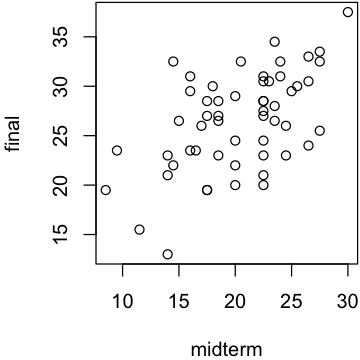

In [67]:
plot(final ~ midterm, data=stat500)

We can fit a linear model with the **`lm`** function.

We want a model of form:

$ y = \beta_0 + \beta_1 x + \varepsilon $

The linear model is specificed using R's special formula syntax. The linear model refers to columns in the data frame `stat500`. The response is given on the left hand side of the `~` ($y$). The right hand side of the `~` specifies the predictors (columns of $X$).


In [98]:
model_a1 <- lm(final ~ 1 + midterm, data=stat500)
print(model_a1)


Call:
lm(formula = final ~ 1 + midterm, data = stat500)

Coefficients:
(Intercept)      midterm  
    15.0462       0.5633  



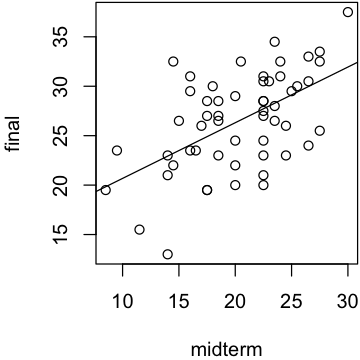

In [99]:
plot(final ~ midterm, data=stat500)
abline(model_a1$coefficients[1], model_a1$coefficients[2])

We can examine what predictors are being used (the matrix $X$) with the `model.matrix` function.

In [69]:
head( model.matrix(~ 1 + midterm, data=stat500) )

(Intercept) midterm
1           1    24.5
2           1    22.5
3           1    23.5
4           1    23.5
5           1    22.5
6           1    16.0

Our model matrix $X$ contains a column for the intercept term and a column for midterm.

Note: R will automatically include an intercept term if we forget, so we could just give the model as `~ midterm`.


How much data do we need to fit a model?

With our straight line model, we obviously need at least two points. With two points we can perfectly fit the data, and the Residual Sum of Squares (RSS) will be zero. However we would have no idea how close we are to the true model!

In general, each new term shaves off a portion of the RSS, even if that coefficient is not a part of the true model. We call the number of data points minus the number of terms the "degrees of freedom" (df).

The residual variance (variance of $\varepsilon$) can be estimated as

$ \sigma^2 = { RSS \over df } $

Working with linear models, we always require at least 1 df so we have some idea of how well the model fits, and less than 5 df or so is quite a dubious exercise.

Let's now consider a simpler model, containing *only* the intercept term.

$ y = \beta_0 + \varepsilon $

In [70]:
head( model.matrix(~ 1, data=stat500) )

model_a0 <- lm(final ~ 1, data=stat500)
model_a0

(Intercept)
1           1
2           1
3           1
4           1
5           1
6           1


Call:
lm(formula = final ~ 1, data = stat500)

Coefficients:
(Intercept)  
      26.49  


**Big idea 2 of 2: Significance test with nested linear models**

Linear model 0 is nested within linear model 1. Anything that model 0 can fit, model 1 can fit at least as well, in terms of Residual Sum of Squares (RSS). This means it is possible to perform an F test, using the **`anova`** function.

Model 1's extra terms will have shaved off some RSS compared to model 0. Has it shaved off more than we would expect if model 0 is true? The statistic $F$ is the ratio of these quantities. $F$ will be around 1 if model 0 is the true model, but much larger if model 1 is shaving off more RSS than we would expect if we believe model 0.

The distribution of $F$ if model 0 is true can be calculated (it's a function of the degrees of freedom of each model), and from this we can give a $p$ value for obtaining a value of $F$ at least as large as we have.

<hr/>

<small>(ANOVA stands for ANalysis Of VAriance. The variance of data can be decomposed into parts explained by different models and a residual part, almost becoming an accounting exercise. Confusingly ANOVA is also used to refer to a particular type of linear model in which this sort of accounting was first developed, which we will meet shortly.)</small>

<small>(When model 1 has just one more term it in than model 0, as here, we could alternatively calculate a statistic called $t$, $F=t^2$, the significance level will be the same.)</small>


In [71]:
print( anova(model_a0, model_a1) )

Analysis of Variance Table

Model 1: final ~ 1
Model 2: final ~ 1 + midterm
  Res.Df     RSS Df Sum of Sq      F    Pr(>F)    
1     54 1325.25                                  
2     53  931.29  1    393.96 22.421 1.675e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We shave off 1 of the 54 degrees of freedom. The RSS was reduced by much more than 1/53 of 931.29, so we obtain a large $F$ statistic and a small $p$ value.

<hr/>

The p value is exactly the same as we obtain from a correlation test.

In [72]:
cor.test(stat500$final, stat500$midterm)


	Pearson's product-moment correlation

data:  stat500$final and stat500$midterm
t = 4.735, df = 53, p-value = 1.675e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3272692 0.7081001
sample estimates:
      cor 
0.5452277 


The `summary` function for the output of `lm` performs a significance test dropping each term in the linear model.

If this is what we want, it's quicker than fitting two linear models and using `anova`.

In [97]:
summary(model_a1)


Call:
lm(formula = final ~ 1 + midterm, data = stat500)

Residuals:
   Min     1Q Median     3Q    Max 
-9.932 -2.657  0.527  2.984  9.286 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.0462     2.4822   6.062 1.44e-07 ***
midterm       0.5633     0.1190   4.735 1.67e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.192 on 53 degrees of freedom
Multiple R-squared:  0.2973,	Adjusted R-squared:  0.284 
F-statistic: 22.42 on 1 and 53 DF,  p-value: 1.675e-05


Fitting a curve
---

We might wonder if a quadratic model would fit better than a straight line model.

We can fit a quadratic curve to this data, of form:

$ y = \beta_0 + \beta_1 x + \beta_2 x^2 $

In [74]:
stat500$midterm_squared <- stat500$midterm ^ 2

model_a2 <- lm(final ~ 1 + midterm + midterm_squared, data=stat500)
model_a2


Call:
lm(formula = final ~ 1 + midterm + midterm_squared, data = stat500)

Coefficients:
    (Intercept)          midterm  midterm_squared  
       17.79751          0.26349          0.00767  


In [75]:
print( anova(model_a1, model_a2) )

Analysis of Variance Table

Model 1: final ~ 1 + midterm
Model 2: final ~ 1 + midterm + midterm_squared
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     53 931.29                           
2     52 928.83  1    2.4542 0.1374 0.7124


The quadratic model was not significantly better than the straight line model.

# Example: one-way ANOVA

You may have noticed R is obsessed with turning character vectors into "factor"s whenever it can.

We're now going to see what factors are for.



coag diet
1    62    A
2    60    A
5    63    B
6    67    B
11   68    C
12   66    C
17   56    D
18   62    D
19   60    D

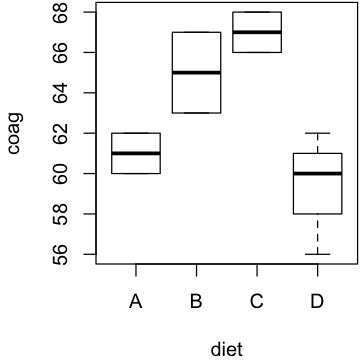

In [76]:
library(faraway)
data(coagulation)
# For brevity's sake, I'm going to use a subset of the data
coagulation <- coagulation[c(1,2,5,6,11,12,17,18,19),]

coagulation
plot(coag ~ diet, data=coagulation)

In [77]:
print(coagulation$diet)

[1] A A B B C C D D D
Levels: A B C D


In the model matrix, a factor is expanded into several "indicator variables".

The first level is treated as a baseline, and terms are created for how much the remaining levels differ from this baseline.

If there is a natural baseline level in the experiment (a "control" or "wildtype"), the factor should be "`relevel`"ed so that this is the first level of the factor, if it isn't already.

In [78]:
model.matrix(~ diet, data=coagulation)

(Intercept) dietB dietC dietD
1            1     0     0     0
2            1     0     0     0
5            1     1     0     0
6            1     1     0     0
11           1     0     1     0
12           1     0     1     0
17           1     0     0     1
18           1     0     0     1
19           1     0     0     1
attr(,"assign")
[1] 0 1 1 1
attr(,"contrasts")
attr(,"contrasts")$diet
[1] "contr.treatment"

An alternative form is possible without the intercept column.

In [79]:
model.matrix(~ 0 + diet, data=coagulation)

dietA dietB dietC dietD
1      1     0     0     0
2      1     0     0     0
5      0     1     0     0
6      0     1     0     0
11     0     0     1     0
12     0     0     1     0
17     0     0     0     1
18     0     0     0     1
19     0     0     0     1
attr(,"assign")
[1] 1 1 1 1
attr(,"contrasts")
attr(,"contrasts")$diet
[1] "contr.treatment"

These two model matrices are equivalent: they will fit with exactly the same residuals.

Model matrices are equivalent if one can be obtained from the other by a series of operations:
* adding or subtracting a multiple of one column from another
* scaling a column by a non-zero amount

Technically, we say two equivalent matrices have the same *column space*.

<hr/>

If in the first model matrix there were a column for `dietA` it would be possible to entirely zero out one of the columns with these operations. This is bad! There would be no unique best fit. Technically speaking, the rank of the matrix would be less than the number of columns.


In [94]:
model_b0 <- lm(coag ~ 1, data=coagulation)
model_b1 <- lm(coag ~ diet, data=coagulation)

print( model_b0 )
print( model_b1 )


Call:
lm(formula = coag ~ 1, data = coagulation)

Coefficients:
(Intercept)  
      62.67  


Call:
lm(formula = coag ~ diet, data = coagulation)

Coefficients:
(Intercept)        dietB        dietC        dietD  
     61.000        4.000        6.000       -1.667  



In [95]:
print( anova(model_b0, model_b1) )

Analysis of Variance Table

Model 1: coag ~ 1
Model 2: coag ~ diet
  Res.Df     RSS Df Sum of Sq      F  Pr(>F)  
1      8 118.000                              
2      5  30.667  3    87.333 4.7464 0.06326 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The model with different means for each group wasn't quite significantly better than the model that all data points have the same mean. If we used the full data set we might get to significance.

If we did achieve significance, we would *reject model 0*, but not necessarily accept model 1. The true model might not be as complex as model 1, perhaps only some of the group means differ from each other. 

Pairwise tests could then be performed with, for example, Tukey's Honest Significant Difference test.

### Checking the meaning of coefficients

It might not be immediately obvious what the coefficients in `model_b1` represent.

We can alway check how coefficients are estimated using the `ginv` function in the `MASS` library. Technically speaking, this is the Moore-Penrose pseudoinverse. It tells us how to estimate our coefficients from our $y$ vector.

Lets see what `ginv` tells us.

In [81]:
library(MASS)
coefficient_estimator <- ginv(model.matrix(~ diet, data=coagulation))
round(coefficient_estimator, 3)

[,1] [,2] [,3] [,4] [,5] [,6]  [,7]  [,8]  [,9]
[1,]  0.5  0.5  0.0  0.0  0.0  0.0 0.000 0.000 0.000
[2,] -0.5 -0.5  0.5  0.5  0.0  0.0 0.000 0.000 0.000
[3,] -0.5 -0.5  0.0  0.0  0.5  0.5 0.000 0.000 0.000
[4,] -0.5 -0.5  0.0  0.0  0.0  0.0 0.333 0.333 0.333

So the "intercept" coefficient is dietA, and dietB, dietC and dietD are differences from this.

# Example: two-way ANOVA

So far we've only used very simple linear model formulas.

With a two factor experiment, there are more questions we can ask.

In this data set we look at the size of PVC pipes produced by different combinations of machine operators and resins.

In [83]:
library(faraway)
data(pvc)

head(pvc)
summary(pvc)

psize operator resin
1  36.2        1     1
2  36.3        1     1
3  35.3        1     2
4  35.0        1     2
5  30.8        1     3
6  30.6        1     3

     psize       operator     resin   
 Min.   :27.10   1:16     1      : 6  
 1st Qu.:30.18   2:16     2      : 6  
 Median :31.85   3:16     3      : 6  
 Mean   :32.35            4      : 6  
 3rd Qu.:35.02            5      : 6  
 Max.   :37.10            6      : 6  
                          (Other):12  

Consider models:

* The effect of operator and resin interact in some complex way, each pairing has a different result.
* The effects of operator and resin have independent additive effects on `psize`.
* Only resin is important.
* Only the operator is important.
* Neither resin nor operator matter.


In [86]:
model_c_interaction <- lm(psize ~ operator*resin, data=pvc)
# Shorthand for
#   psize ~ 1 + operator + resin + operator:resin

model_c_operator_resin <- lm(psize ~ operator + resin, data=pvc)
model_c_operator <- lm(psize ~ operator, data=pvc)
model_c_resin <- lm(psize ~ resin, data=pvc)
model_c_null <- lm(psize ~ 1, data=pvc)

model_c_interaction


Call:
lm(formula = psize ~ operator * resin, data = pvc)

Coefficients:
     (Intercept)         operator2         operator3            resin2  
           36.25             -0.85             -0.95             -1.10  
          resin3            resin4            resin5            resin6  
           -5.55             -6.55             -4.40             -6.05  
          resin7            resin8  operator2:resin2  operator3:resin2  
           -3.35              0.55              1.05             -0.85  
operator2:resin3  operator3:resin3  operator2:resin4  operator3:resin4  
           -0.20             -0.55              1.20             -0.10  
operator2:resin5  operator3:resin5  operator2:resin6  operator3:resin6  
            0.40             -1.60              1.30              0.50  
operator2:resin7  operator3:resin7  operator2:resin8  operator3:resin8  
            0.45              0.85              0.50             -2.70  


In [89]:
print( anova( model_c_operator_resin, model_c_interaction) )

Analysis of Variance Table

Model 1: psize ~ operator + resin
Model 2: psize ~ operator * resin
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1     38 49.815                           
2     24 35.480 14    14.335 0.6926 0.7599


In [90]:
print( anova( model_c_operator, model_c_operator_resin) )

Analysis of Variance Table

Model 1: psize ~ operator
Model 2: psize ~ operator + resin
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1     45 333.76                                  
2     38  49.82  7    283.95 30.943 8.111e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [91]:
print( anova( model_c_resin, model_c_operator_resin) )

Analysis of Variance Table

Model 1: psize ~ resin
Model 2: psize ~ operator + resin
  Res.Df    RSS Df Sum of Sq     F  Pr(>F)   
1     40 70.533                              
2     38 49.815  2    20.718 7.902 0.00135 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We do not have evidence for interaction between the two factors, however each factor is significant. The model in which the operator and resin have independent additive effects on `psize` seems best.

# More complex models

If we have several independent variables or factors, we can construct models containing different terms for these and interactions between them.

For example we could compare fitting a single line of best fit against fitting a line of best fit to different groups (ANCOVA).



# Familiar tests are special cases of linear models

`~1` calculates the mean.

If `a` is a factor with 2 levels, `~a` vs `~1` is a t-test. 

If `a` is a factor with 2 levels and `b` is a factor with many levels, `~a+b` vs `~b` is a paired samples t-test. 

If `x` is numeric, `~x` vs `~1` tests for significant correlation.



# Linear models in limma and edgeR

Limma and edgeR are packages for detecting differential expression of genes. Each gene is tested in turn. The statistics involved are an extension of the idea of linear modelling, and all of the nested model tests we've just seen can be used, however the interface is slightly different.

* The more complex model is given as a model matrix (aka "design matrix").


* The simpler model can be specified in two different ways:
  1. A set of terms to drop from the more complex model.
  2. A set of contrasts of coefficients which must be zero in the simpler model. 

We saw that a linear model can be specified in different ways, it is always possible to construct a model matrix so that method 1 may be used. 

Some people prefer method 2, often with the no-intercept form of the model matrix. However this it doesn't extend as naturally to more complex models.


We have been working with data sets where the response variable is a continuous value, with normally distributed residuals. What if our data isn't like this?

## Tranformation

Sometimes a transformation of $y$ is sufficient to render residuals sufficiently normally distributed.

For example, if the values are all positive it's often appropriate to perform a log transformation.

## Generalized Linear Models

If transformation isn't applicable, Generalized Linear Models (GLMs) allow for data with different distributions, including discrete distributions, and give control over the exact manner in which the linear model is linked to the data.

* Logistic regression attempts to predict a binary outcome.
* Negative binomial regression can be used with count data, such as RNA-Seq.

In R, the function `glm` is used to fit GLMs.


# Random effects and mixed models

The one-way and two-way ANOVA models we looked at were examples of "fixed effects" models.

Sometimes one of our factors consists of individuals drawn from a random population, and we want to characterize that population. This is called a "random effect". For example, we might want to know how much variability there is between different patients in a population, and how an average patient will behave. If we start working with a new patient we might initially expect them to behave as an average patient, but refine our expectations as we gain data (moderated estimation of coefficients).

A model combining random effects and fixed effects is called a mixed model.


# Further reading

Much of this talk has been based on a book by Julian Faraway called "Linear Models with R".

Also by Julian Faraway, "Extending the Linear Model with R" introduces GLMs, mixed models, and other fun topics.

